In [17]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
stock1 = "ICE"
stock2 = "SHW"

spread = pd.read_csv(f"../data/spread/spread_{stock1}_{stock2}.csv", index_col=0)
spread.index = pd.to_datetime(spread.index)
# spread.head()
print(spread.index[-1])

2024-05-20 00:00:00


In [19]:
adf_test = adfuller(spread["Spread"])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.507073
p-value: 0.000002


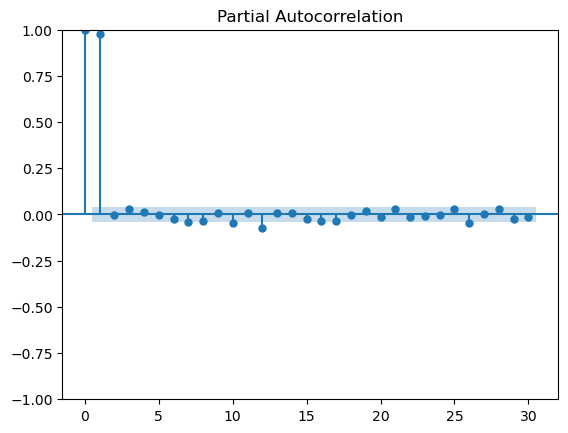

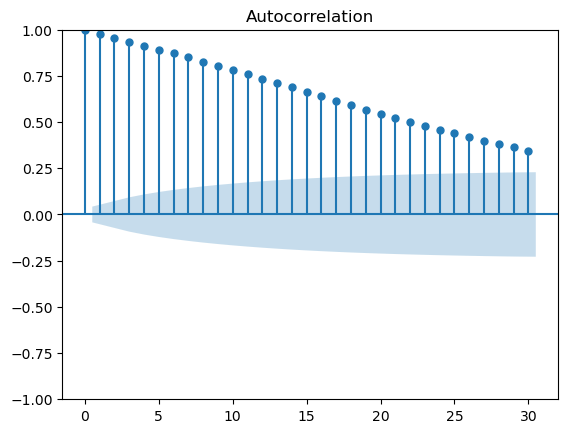

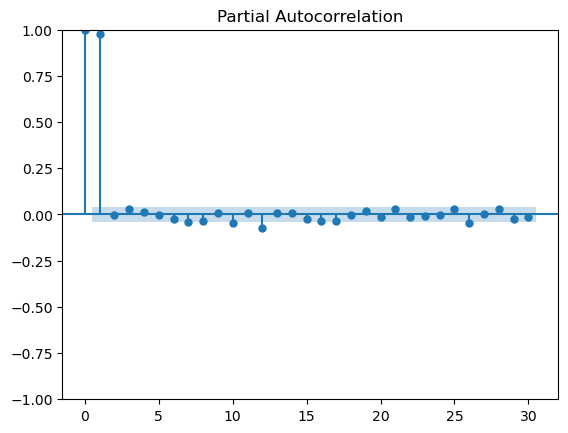

In [20]:
plot_acf(spread["Spread"], lags=30)
plot_pacf(spread["Spread"], lags=30)

In [21]:
train_size = 0.9
train_index = int(len(spread) * train_size)
forecasts = []
for i in range(train_index, len(spread)):
    model = ARIMA(spread[:i], order=(1, 0, 1))
    # (p, d, q)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    forecast = np.float64(forecast.iloc[0])
    forecasts.append(forecast)

forecasts_series = pd.DataFrame(forecasts, index=spread[train_index:].index)

C:\Users\18363\miniconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18363\miniconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18363\miniconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18363\miniconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

In [22]:
loss = mean_squared_error(spread.iloc[train_index:], forecasts_series)
print(f"MSE loss: {loss}")

MSE loss: 0.04360752795475771


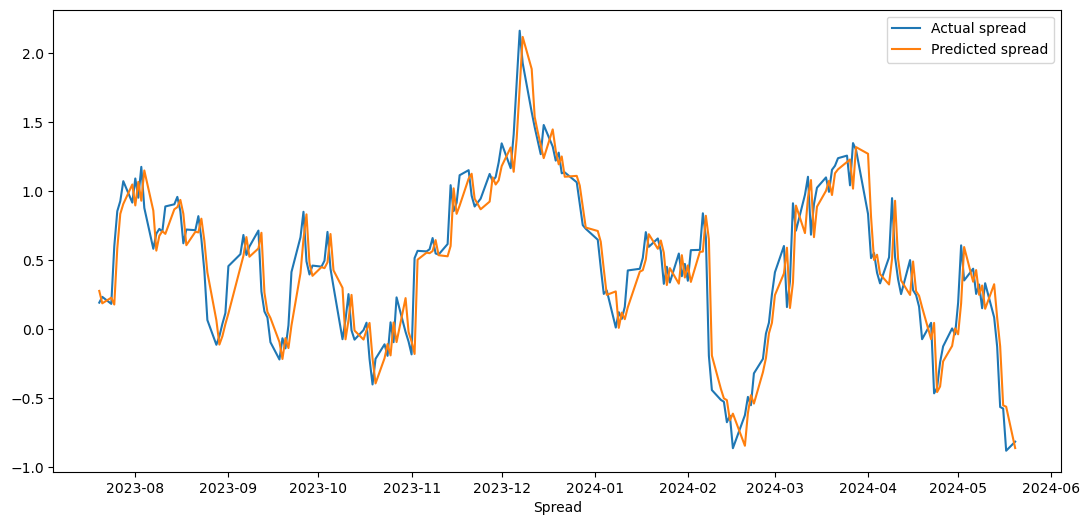

In [23]:
plt.figure(figsize=(13, 6))
plt.plot(spread.iloc[train_index:], label="Actual spread")
plt.plot(forecasts_series, label="Predicted spread")
plt.xlabel("Day")
plt.xlabel("Spread")
plt.legend()
plt.show()

In [24]:
forecasts_series.to_csv(f"./validation_result/ARIMA_{stock1}_{stock2}.csv")